## Neural Networks
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will build a Multi-Layer Perceptron Neural Network in Python and then use it on the Spotify dataset.

In [8]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from sklearn.model_selection import train_test_split

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

import tensorflow

In [9]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()
df.head()

# Genre data subsets
bluegrass = df[df['track_genre'] == 'bluegrass']
heavy = df[df['track_genre'] == 'heavy-metal']
hiphop = df[df['track_genre'] == 'hip-hop']
altrock = df[df['track_genre'] == 'alt-rock']

### Background

After analyzing the data and finding genres with a fair amount of songs in the dataset, I decided to pick different genres: Bluegrass, Heavy Metal, Hip-Hop, and Alternative Rock, in hopes to be able to classify these genres based on their audio statistics with accuracy using neural networks.

In [10]:
# Build neural network of different genres

full_df = pd.concat([bluegrass, heavy, hiphop, altrock])

# Create X and y
from sklearn.preprocessing import LabelEncoder, StandardScaler
y = LabelEncoder().fit_transform(full_df['track_genre'])
X = full_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(11,)),
    tensorflow.keras.layers.Dense(11, activation='relu'),
    tensorflow.keras.layers.Dropout(0.2),
    tensorflow.keras.layers.Dense(11, activation='tanh'),
    tensorflow.keras.layers.Dense(4, activation='softmax')
])


model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=.01), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


History = model.fit(X_train, y_train, epochs=25, validation_data = (X_test, y_test), verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.6179 


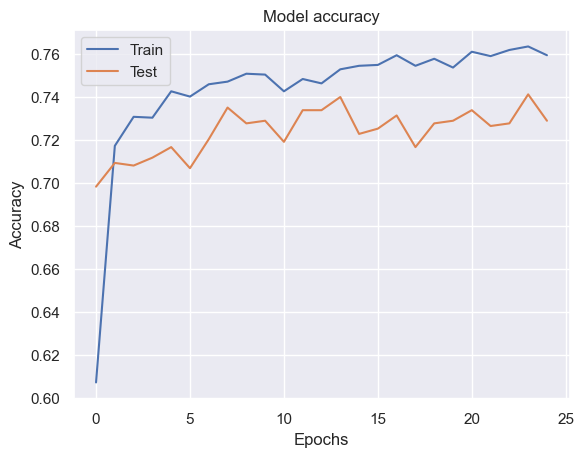

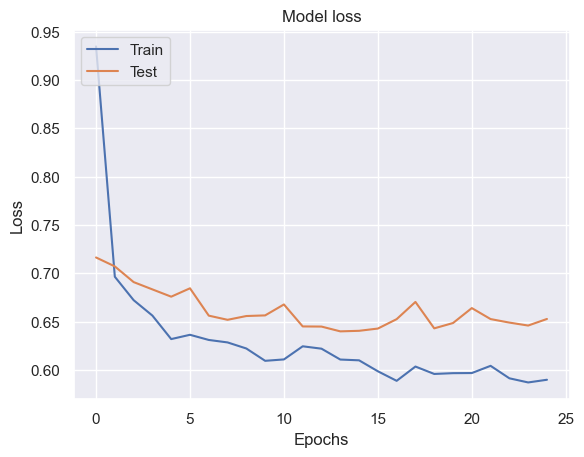

In [11]:
# Plot history of training and testing

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


As can be seen above, the model essentially converges to an accuracy of .75 on the training data and an accuracy of .725 on the testing data. While this isn't the most accurate, it is still quite impressive, as the model does not become too overfit on the training data and the data likely has many overlaps in it that would make it less separable/predictable. 